<h1>Part 1: Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np

<h1>Part 2: Loading Datasets</h1>

In [2]:
trainDataBinary = pd.read_csv('data\TrainingDataBinary.csv', sep=',')
testDataBinary = pd.read_csv('data\TestingDataBinary.csv', sep=',')

# to check whether data was correctly loaded
print("Part A Training Data")
trainDataBinary.info() 
print("\nPart A Testing Data")
testDataBinary.info()

Part A Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(17)
memory usage: 5.9 MB

Part A Testing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 128 entries, R1-PA1:VH to snort_log4
dtypes: float64(112), int64(16)
memory usage: 100.1 KB


<h1>Part 3: Data Preprocessing</h1>

The hold-out method was used to separate the labelled data instances into a training set and a test set. A 80-20 split was used instead of a 70-30 split. The 80-20 split gives a larger training set for the model, which can potentially improve classification performance.

The provided training data has a balanced distribution of the two labels. Therefore, the training set and test set will also has the same distribution. 

In [3]:
from sklearn.model_selection import train_test_split

# getting the labels
Y = trainDataBinary['marker']
# removing the labels in the dataset
X = trainDataBinary.drop('marker',axis=1)

# splitting the training dataset into training set and test set
# 80-20 split (larger training set to improve model performance)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=58, stratify=Y)

In [4]:
# ensuring test set has 50-50 split of labels
Y_test.value_counts()

1    600
0    600
Name: marker, dtype: int64

MinMax Scaling to attempt to speed up CV.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
testDataBinary = scaler.transform(testDataBinary)

<h1>Part 4: Feature Selection</h1>

None. Raw features were used to train the model.

<h1>Part 5: Model Selection (Logistic Regression)</h1>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

clf.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

<h1>Part 6: Hyperparameter Tuning</h1>

None.

<h1>Part 7: Final Evaluation on Test Set</h1>

Positive case = Abnormal cases

Negative case = Normal cases

FP = Normal classified as Abnormal

FN = Abnormal classified as Normal

TP = Abnormal classified as Abnormal

TN = Normal classified as Normal

In [7]:
from sklearn import metrics
from matplotlib import pyplot as plt

def eval(title, target, prediction):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for true, guess in zip(Y_test, Y_pred):
        if(true == 1 and guess == 1):
            TP = TP + 1
        if(true == 0 and guess == 1):
            FP = FP + 1
        if(true == 0 and guess == 0):
            TN = TN + 1
        if(true == 1 and guess == 0):
            FN = FN + 1
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    manual_f1 = 2 * (precision * recall) / (precision + recall)
    
    acc = metrics.accuracy_score(target, prediction)
    f1 = metrics.f1_score(target, prediction, pos_label=1)
    
    target_names = ['normal', 'abnormal']
    cm = metrics.confusion_matrix(target, prediction)
    cmplt = metrics.ConfusionMatrixDisplay(cm)
    cmplt.plot()
    plt.title(title)
    plt.show()
    
    print("\n")
    print(title)
    print("\n")
    print("TP: %d FP: %d TN: %d FN: %d" % (TP, FP, TN, FN))
    print("Accuracy: %0.3f" % acc)
    print("Built-in function F1: %0.3f" % f1)
    print("Manually calculated F1: %0.3f" % manual_f1)
    print("\n")
    
    print(metrics.classification_report(target, prediction, target_names=target_names))

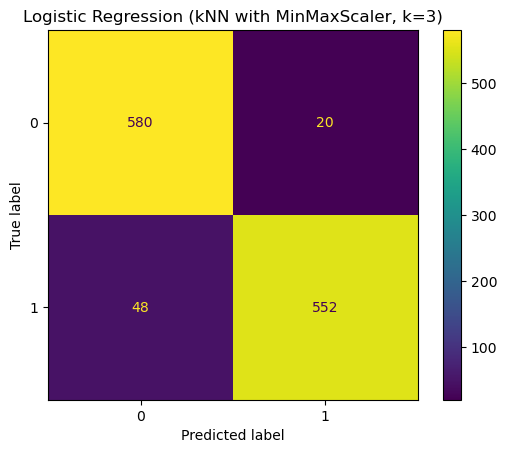



Logistic Regression (kNN with MinMaxScaler, k=3)


TP: 552 FP: 20 TN: 580 FN: 48
Accuracy: 0.943
Built-in function F1: 0.942
Manually calculated F1: 0.942


              precision    recall  f1-score   support

      normal       0.92      0.97      0.94       600
    abnormal       0.97      0.92      0.94       600

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200

Final Accuracy:  0.9433333333333334


In [8]:
Y_pred = clf.predict(X_test)
eval("Logistic Regression (kNN with MinMaxScaler, k=3)", Y_test, Y_pred)
accuracy = clf.score(X_test, Y_test)
print("Final Accuracy: ", accuracy)

<h1>Part 8: Predicting Test Set</h1>

In [9]:
Y_final = clf.predict(testDataBinary)
Y_final = pd.DataFrame(Y_final, columns=['Final Prediction'])

In [10]:
Y_final.value_counts()

Final Prediction
1                   64
0                   36
dtype: int64

<h1>Part 9: Exporting to .csv File</h1>

In [11]:
Y_final.to_csv('results_csv/A8.csv', index=False)